# Assignment 1
## EDA on Haberman dataset
### Source of [dataset](https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1)

**Description:**<br>
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load .csv into a dataframe
df = pd.read_csv("haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Initial observations about the data

In [3]:
print(df.info())  #this method displays column types, no. of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


Observations:<br>
1. The given dataset has 4 variables and 306 observations.
2. All the columns have integer values
3. There aren't any null values in any columns.

Column meanings:<br>
 - age: The age of the patient at the time of the operation
 - year: Year in which operation was performed (after 1900)
 - nodes: Number of positive axillary nodes detected
 - status: Survival status (class attribute) 1= patient survived 5 years or longer. 2= patient died within 5 years of the operation.

Objective: To predict whether a patient would live more than 5 years or not, based upon the given features

In [4]:
# number of classes
print("*"*10,"age","*"*10)
print(df['age'].value_counts(),"\n")

print("*"*10,"year","*"*10)
print(df['year'].value_counts(),"\n")

print("*"*10,"nodes","*"*10)
print(df['nodes'].value_counts(),"\n")

print("*"*10,"status","*"*10)
print(df['status'].value_counts())

********** age **********
52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64 

********** year **********
58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64 

********** nodes **********
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: n

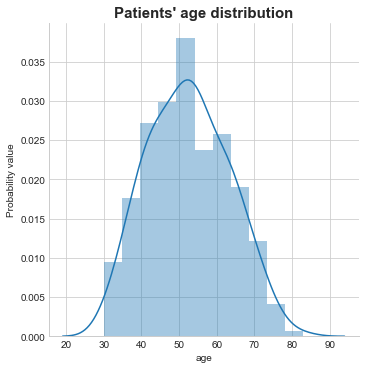

In [5]:
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(df, size=5) \
   .map(sns.distplot, "age");
plt.title("Patients' age distribution",weight='bold').set_fontsize('15')
plt.ylabel("Probability value")
plt.show();

Observation
 - Most of the patients (36%) were around 45 to 50 years of age when operated.

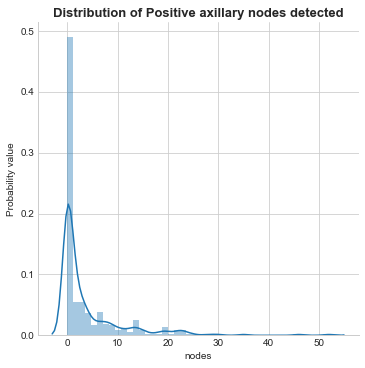

In [6]:
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(df, size=5) \
   .map(sns.distplot, "nodes");
plt.title("Distribution of Positive axillary nodes detected",weight='bold').set_fontsize('13')
plt.ylabel("Probability value")
plt.show();

Observation
 - Around 50% of patients do not have any positive axillary nodes detected

In [7]:
pd.crosstab(df['nodes'], df['status'])

status,1,2
nodes,,
0,117,19
1,33,8
2,15,5
3,13,7
4,10,3
5,2,4
6,4,3
7,5,2
8,5,2


In [8]:
# source code:-
"https://stackoverflow.com/questions/37818063/how-to-calculate-conditional-probability-of-values-in-dataframe-pandas-python"
# To calculate conditional probability
nodes_probs = df.groupby('nodes').size().div(len(df))
nodes_prob_df = df.groupby(['status', 'nodes']).size().div(len(df)).div(nodes_probs, axis=0, level='nodes')
nodes_prob_df

status  nodes
1       0        0.860294
        1        0.804878
        2        0.750000
        3        0.650000
        4        0.769231
        5        0.333333
        6        0.571429
        7        0.714286
        8        0.714286
        9        0.333333
        10       0.666667
        11       0.250000
        12       0.500000
        13       0.200000
        14       0.750000
        15       0.333333
        16       1.000000
        18       1.000000
        19       0.333333
        20       0.500000
        22       0.666667
        25       1.000000
        28       1.000000
        30       1.000000
        46       1.000000
2       0        0.139706
        1        0.195122
        2        0.250000
        3        0.350000
        4        0.230769
        5        0.666667
        6        0.428571
        7        0.285714
        8        0.285714
        9        0.666667
        10       0.333333
        11       0.750000
        12       0.50000

Observations:
 - Patients who have been detected with 0 to 4 positive auxillary nodes, have 65% to 86% chances to live beyond 5 years after the operation.

In [9]:
df_status1 = df.loc[df['status'] == 1]
df_status2 = df.loc[df['status'] == 2]

[ 0.66666667  0.06666667  0.05777778  0.04444444  0.00888889  0.01777778
  0.04444444  0.00888889  0.00888889  0.00444444  0.00444444  0.00444444
  0.01333333  0.00888889  0.          0.00444444  0.00444444  0.00444444
  0.          0.00888889  0.          0.00444444  0.          0.
  0.00444444  0.          0.00444444  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.00444444]
[  0.     1.15   2.3    3.45   4.6    5.75   6.9    8.05   9.2   10.35
  11.5   12.65  13.8   14.95  16.1   17.25  18.4   19.55  20.7   21.85  23.
  24.15  25.3   26.45  27.6   28.75  29.9   31.05  32.2   33.35  34.5
  35.65  36.8   37.95  39.1   40.25  41.4   42.55  43.7   44.85  46.  ]
[ 0.66666667  0.73333333  0.79111111  0.83555556  0.84444444  0.86222222
  0.90666667  0.91555556  0.92444444  0.92888889  0.93333333  0.93777778
  0.95111111  0.96        0.96        0.96444444  0.96888889  0.97333333
  0.97333333  0.98222222  0.

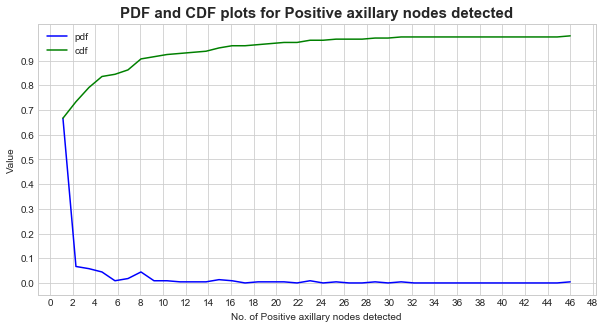

In [10]:
plt.close()
counts, bin_edges = np.histogram(df_status1['nodes'], bins=40, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf)
plt.figure(figsize=(10,5))  # to set figure size. should be provided before plotting of figure
plt.plot(bin_edges[1:],pdf,'b', label='pdf');
plt.plot(bin_edges[1:], cdf,'g', label='cdf')
plt.legend()
plt.title("PDF and CDF plots for Positive axillary nodes detected",weight='bold').set_fontsize('15')
plt.xlabel("No. of Positive axillary nodes detected")
plt.ylabel("Value")
plt.xticks(np.arange(0, 50, 2))  # to change precision of scales
plt.yticks(np.arange(0, 1, 0.1))
plt.show()
plt.close()


Observations:
 - Among the patients who have lived beyond 5 years after the operation, 80% of those have been detected with 0 to 4 positive axillary nodes.
 - Chances of survival are more if no. of positive axillary nodes detected are less.

In [11]:
print("\nMedians:")
print("Status = 1 ",np.median(df_status1['age']))
print("Status = 2 ",np.median(df_status2['age']))

print("\nMaximum:")
print("Status = 1 ",max(df_status1['age']))
print("Status = 2 ",max(df_status2['age']))

print("\nMinimum:")
print("Status = 1 ",min(df_status1['age']))
print("Status = 2 ",min(df_status2['age']))

print("\nQuantiles")
print("Status = 1 ",np.percentile(df_status1['age'], np.arange(25, 101, 25)))
print("Status = 2 ",np.percentile(df_status2['age'], np.arange(25, 101, 25)))


Medians:
Status = 1  52.0
Status = 2  53.0

Maximum:
Status = 1  77
Status = 2  83

Minimum:
Status = 1  30
Status = 2  34

Quantiles
Status = 1  [ 43.  52.  60.  77.]
Status = 2  [ 46.  53.  61.  83.]


In [12]:
print("\nMedians:")
print("Status = 1 ",np.median(df_status1['year']))
print("Status = 2 ",np.median(df_status2['year']))

print("\nMaximum:")
print("Status = 1 ",max(df_status1['year']))
print("Status = 2 ",max(df_status2['year']))

print("\nMinimum:")
print("Status = 1 ",min(df_status1['year']))
print("Status = 2 ",min(df_status2['year']))

print("\nQuantiles")
print("Status = 1 ",np.percentile(df_status1['year'], np.arange(25, 101, 25)))
print("Status = 2 ",np.percentile(df_status2['year'], np.arange(25, 101, 25)))


Medians:
Status = 1  63.0
Status = 2  63.0

Maximum:
Status = 1  69
Status = 2  69

Minimum:
Status = 1  58
Status = 2  58

Quantiles
Status = 1  [ 60.  63.  66.  69.]
Status = 2  [ 59.  63.  65.  69.]


## Boxplots

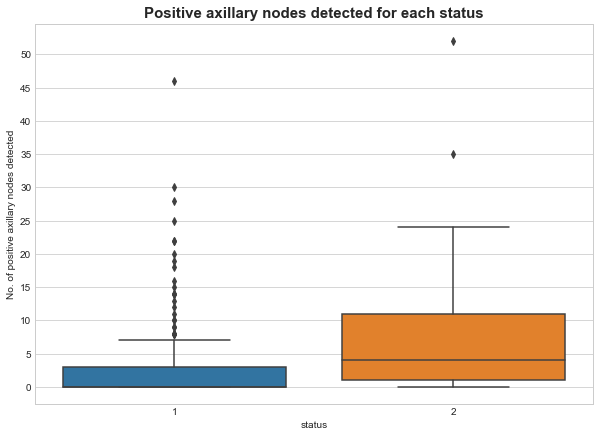

In [13]:
plt.close()
plt.figure(figsize=(10,7))
sns.boxplot(x="status", y="nodes", data=df)
plt.title("Positive axillary nodes detected for each status",weight='bold').set_fontsize('15')
plt.ylabel("No. of positive axillary nodes detected")
plt.yticks(np.arange(0,55,5))
plt.show()

Observation:
 - Patients with less value of positive axillary nodes detected (0-4) have more chance of surviving beyond 5 years.

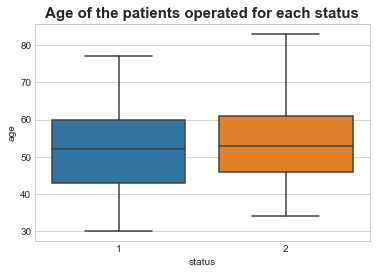

In [14]:
plt.close()
sns.boxplot(x="status", y="age", data=df)
plt.title("Age of the patients operated for each status",weight='bold').set_fontsize('15')
plt.show()

Observation
 - As the age of the person increases, survival chance decreases.

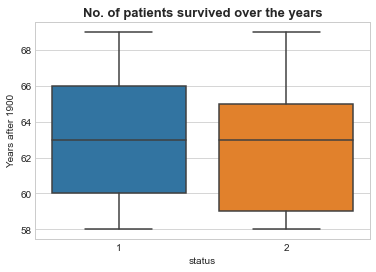

In [15]:
plt.close()
sns.boxplot(x="status", y="year", data=df)
plt.title("No. of patients survived over the years", weight='bold').set_fontsize('13')
plt.ylabel("Years after 1900")
plt.show()

Observations
 - Percentage of patients who survived beyond 5 years are higher as years passes by. 

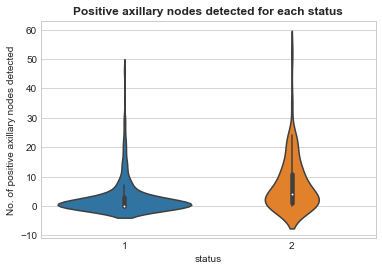

In [16]:
plt.close()
sns.violinplot(x="status", y="nodes", data=df)
plt.title("Positive axillary nodes detected for each status", weight='bold')
plt.ylabel("No. of positive axillary nodes detected")
plt.show()

Observation:
 - Patients with less value of positive axillary nodes detected (0-4) have more chance of surviving beyond 5 years.

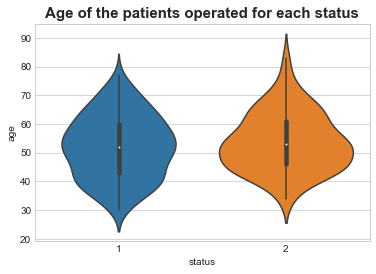

In [17]:
plt.close()
sns.violinplot(x="status", y="age", data=df)
plt.title("Age of the patients operated for each status", weight='bold').set_fontsize('15')
plt.show()

Observation
 - Most of the patients who couldn't survive beyond 5 years after the operation were around the age of 50 years.

## Multivariate plots

In [18]:
df2 = df[['age','year','nodes']]
df2.head()

,age,year,nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


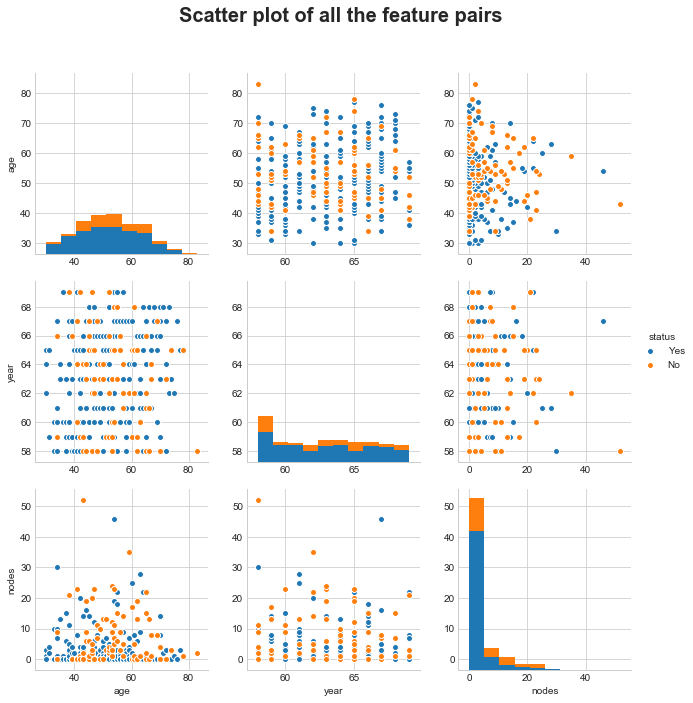

In [19]:
df2["status"] = df["status"].apply(lambda x: 'Yes' if x==1 else 'No')
plt.close();
#sns.set_style("whitegrid");
p=sns.pairplot(df2, hue="status", size=3);
p.fig.suptitle("Scatter plot of all the feature pairs", y=1.08, weight='bold').set_fontsize('20')
plt.show()

Observations:
 - From the first diagonal plot, i.e., age distribution by status, it is clear that among 45 to 55 years of patients, percentage of non-survival is more as compared to other age group patients.
 - From the third diagonal plot, i.e., distribution of number of positive axillary nodes detected by status, it is clear that as the number of positive axillary nodes detected increases, survival chances of the patient decreases.

### Joint plot for the patients living beyond 5 years (status = 1)

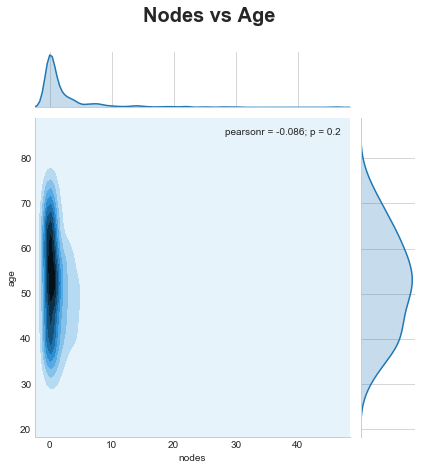

In [20]:
#2D Density plot, contors-plot
plt.close()
p=sns.jointplot(x="nodes", y="age", data=df_status1, kind="kde");
p.fig.suptitle("Nodes vs Age", weight='bold', y=1.08).set_fontsize('20')
plt.show();

Observation
 - Chances of survival are more for persons of age around 55 years and having no positive nodes detected.

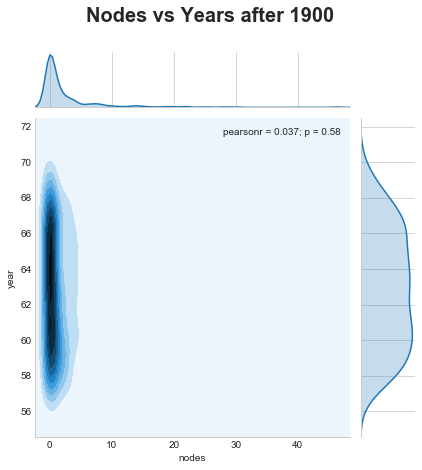

In [21]:
plt.close()
p=sns.jointplot(x="nodes", y="year", data=df_status1, kind="kde");
p.fig.suptitle("Nodes vs Years after 1900", weight='bold', y=1.08).set_fontsize('20')
plt.show();

Observation
 - Patients wwho were operated in 1960s and were not detected with any positive axillary nodes, have more chance for survival.

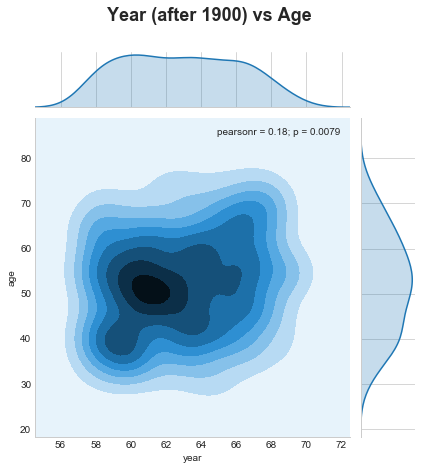

In [22]:
plt.close()
p=sns.jointplot(x="year", y="age", data=df_status1, kind="kde");
p.fig.suptitle("Year (after 1900) vs Age", y=1.08, weight='bold').set_fontsize('18')
plt.show();

Observation
 - Patients who were operated between 1960 to 1962 and of aged around 50 years, survived beyond 5 years.

### Joint plot for the patients who couldn't survive beyond 5 years (status = 2)

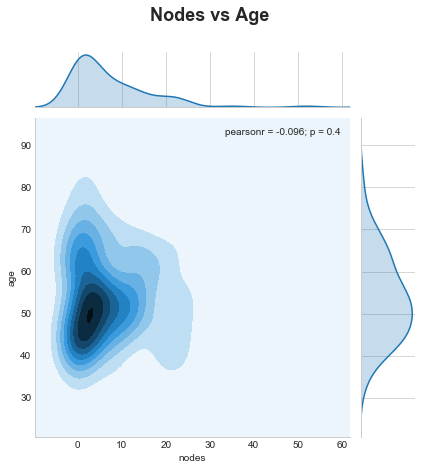

In [26]:
plt.close()
p=sns.jointplot(x="nodes", y="age", data=df_status2, kind="kde");
p.fig.suptitle("Nodes vs Age", weight='bold', y=1.08).set_fontsize('18')
plt.show();

Observation
 - Patients with 2 positive axillary nodes and of age around 50 years, couldn't survive 5 years after the operation.

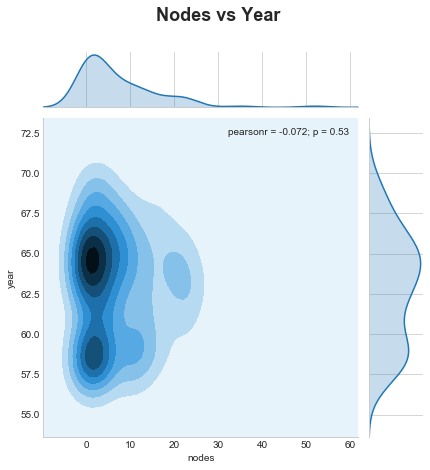

In [28]:
plt.close()
p=sns.jointplot(x="nodes", y="year", data=df_status2, kind="kde");
p.fig.suptitle("Nodes vs Year", y=1.08, weight='bold').set_fontsize(18)
plt.show();

Observation
 - Patients with 2 positive axillary nodes and who were operated around the year 1964, couldn't survive the 5 years after the operation.

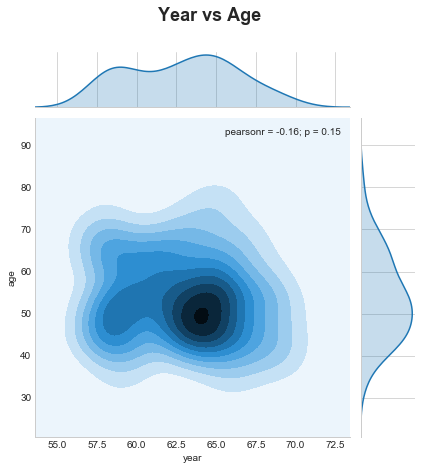

In [29]:
plt.close()
p=sns.jointplot(x="year", y="age", data=df_status2, kind="kde");
p.fig.suptitle("Year vs Age", y=1.08, weight='bold').set_fontsize(18)
plt.show();

Observation
 - Patients of age around 50 years and who were operated around 1964, couldn't survive the 5 years after the operation.

References:
[link](https://stackoverflow.com/questions/40185446/how-to-put-in-bold-the-title-in-a-seaborn-factorplot)